### Objective

- Learn how to implement DBSCAN on a real-world dataset (Socio-economic data by country)
- Use DBSCAN to cluster/segment data
- Visualize the clusters and the outliers

In [1]:
# Importing important libraries
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Importing data and transforming using PCA
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")

# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))


# Removing the outliers

country_data_outliers_removed = country_data[(z<3).all(axis=1)]


X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

pca_final = PCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      2.007808  0.775381  1.448071  0.165315  0.585043   1.387054   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

## DBSCAN

In [3]:
# Import libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [17]:
# DBSCAN model
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(X_pca_final)

DBSCAN(eps=1, min_samples=3)

In [18]:
# Print DBSCAN labels
# Noisy samples are given the label -1
dbscan.labels_

array([ 0,  0,  0, -1,  0,  1,  0,  2,  2,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  2,  0,  0,  0,  0, -1,  4,  0,
        0,  2,  2, -1,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  1, -1, -1,  2,  2,  0,  2,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,
       -1,  3,  0, -1,  2, -1,  4,  0,  0,  0,  0,  0,  2,  0,  1, -1,  0,
       -1,  0,  0, -1,  0,  0,  3, -1, -1,  2,  0,  0,  4,  0,  2,  0,  0,
        0,  4, -1,  0,  0,  0, -1,  0,  0, -1,  2,  0,  0,  0, -1, -1,  0])

In [19]:
# Print silhouette score
silhouette_avg = silhouette_score(X_pca_final, dbscan.labels_)
print(silhouette_avg)

-0.10123866089199998


In [20]:
# Assign cluster labels to each row in a new column DBSCAN_Cluster_ID
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])
X_pca_final_df['DBSCAN_Cluster_ID'] = dbscan.labels_

<Axes: xlabel='PC1', ylabel='PC2'>

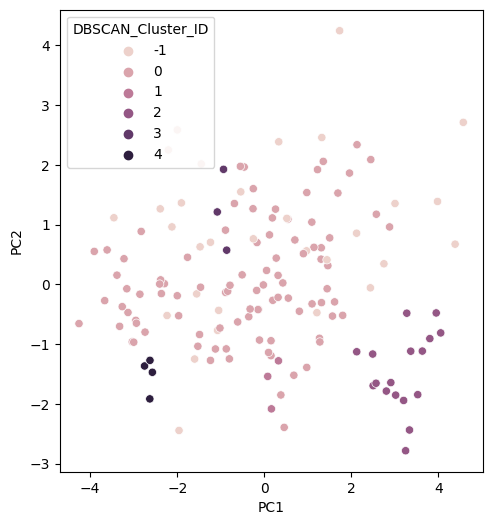

In [21]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='DBSCAN_Cluster_ID')